<a href="https://colab.research.google.com/github/Nahdahyhm/EDA/blob/main/mare_%26_nahda_student_performance_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
pyplot.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('/content/Cleaned_Students_Performance.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB


# Mengecek baris di dataset

In [ ]:
num_records = len(data)
num_records

1000

# Mengecek kolom di dataset

In [ ]:
num_columns = len(data.columns)
num_columns

10

# Mengecek apakah ada data yang kosong

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values and their count
missing_values[missing_values > 0]

,0


# Menghapus kolom untuk menguji heatmap

In [ ]:
# Menghapus kolom
data.drop(columns=['race_ethnicity', 'parental_level_of_education'], inplace=True)

# Menampilkan DataFrame untuk memastikan kolom terhapus
data

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,1,0,72,72,74,218,72.666667
1,0,1,1,69,90,88,247,82.333333
2,0,1,0,90,95,93,278,92.666667
3,1,0,0,47,57,44,148,49.333333
4,1,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...
995,0,1,1,88,99,95,282,94.000000
996,1,0,0,62,55,55,172,57.333333
997,0,0,1,59,71,65,195,65.000000
998,0,1,1,68,78,77,223,74.333333


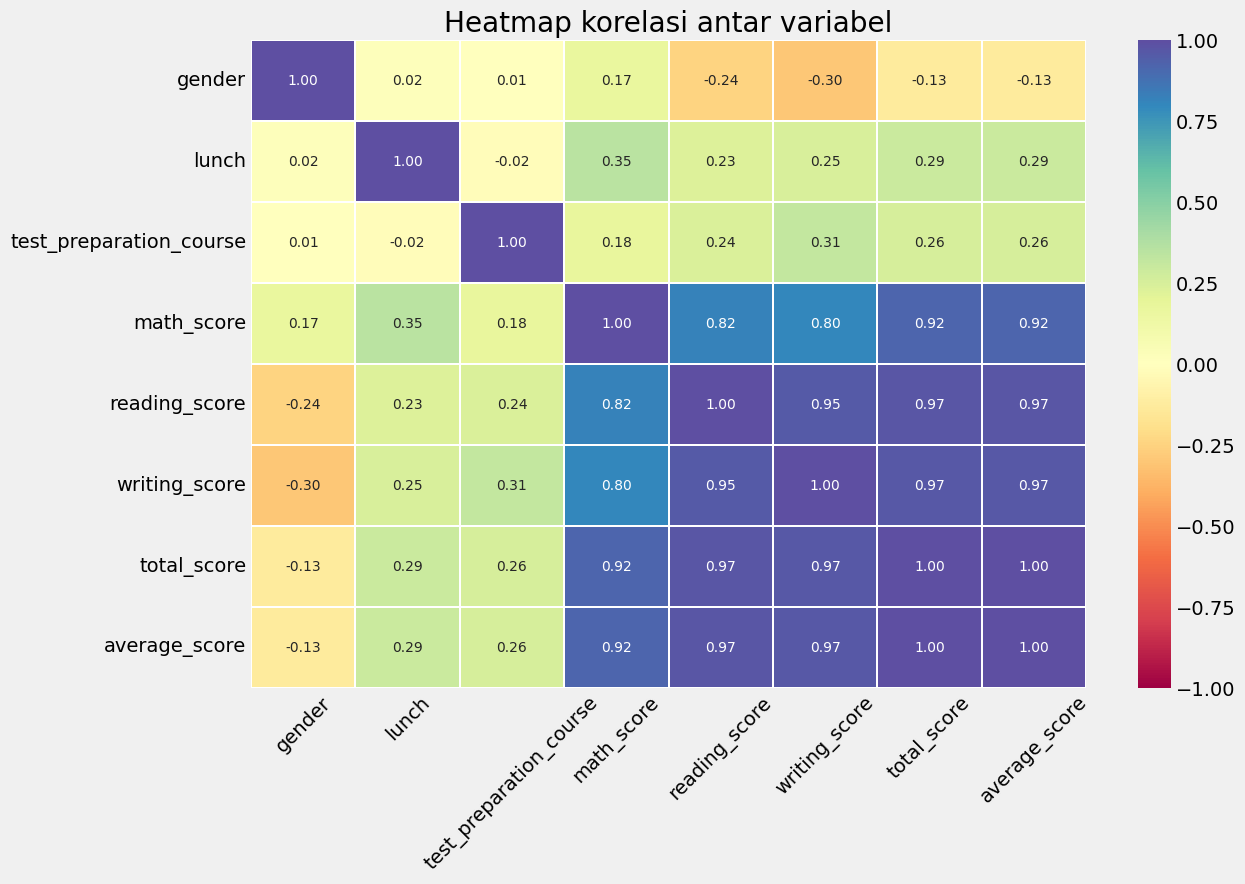

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung matriks korelasi
correlation_matrix = data.select_dtypes(include=np.number).corr()

# Membuat heatmap menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="Spectral",
    vmin=-1,
    vmax=1,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    linewidths=0.1,
    annot_kws={"size": 10}
)
plt.xticks(rotation=45)
plt.title("Heatmap korelasi antar variabel")
plt.show()

Penjelasan

---
*   Warna biru: Menunjukkan korelasi tinggi (nilai mendekati 1 atau -1), yang berarti ada hubungan yang kuat antara dua variabel tersebut.
*   Warna kuning Gelap / oren: Menunjukkan korelasi rendah atau hampir tidak ada korelasi (nilai mendekati 0), yang berarti variabel tersebut tidak memiliki hubungan linier yang signifikan.

interpretasi


---
* math_score, reading_score, dan writing_score memiliki korelasi yang sangat kuat dengan total_score dan average_score (0.92 hingga 0.97). Ini menunjukkan bahwa ketiga skor ini adalah kontributor utama untuk skor total dan rata-rata.
* lunch memiliki korelasi positif rendah dengan total_score (0.29) dan average_score (0.29), yang berarti faktor makan siang memengaruhi skor akademik secara moderat.
* test_preparation_course memiliki korelasi positif lemah hingga sedang dengan writing_score (0.31), yang menunjukkan dampak moderat dari kursus persiapan ujian terhadap keterampilan menulis
* gender memiliki korelasi negatif kecil dengan sebagian besar variabel, misalnya writing_score (-0.30). Ini menunjukkan bahwa perbedaan gender tidak memiliki pengaruh besar terhadap skor.


# Mengganti nama variabel

In [ ]:
# Mengganti nama variabel
data.rename(columns={'gender' : 'x1', 'lunch' : 'x2', 'test_preparation_course' : 'x3', 'math_score' : 'x4', 'reading_score' : 'x5',
                   'writing_score' : 'x6', 'total_score' : 'y1', 'average_score' : 'y2'}, inplace=True)
data

,x1,x2,x3,x4,x5,x6,y1,y2
0,0,1,0,72,72,74,218,72.666667
1,0,1,1,69,90,88,247,82.333333
2,0,1,0,90,95,93,278,92.666667
3,1,0,0,47,57,44,148,49.333333
4,1,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...
995,0,1,1,88,99,95,282,94.000000
996,1,0,0,62,55,55,172,57.333333
997,0,0,1,59,71,65,195,65.000000
998,0,1,1,68,78,77,223,74.333333


# Menentukkan OLS

In [ ]:
import statsmodels.api as sm

# Pilih semua kolom numerik
numeric_data = data.select_dtypes(include='number')

# Pilih Sleep_Duration sebagai variabel dependen (y)
y = numeric_data["y1"]

# Gunakan semua variabel lain sebagai variabel independen (X), kecuali Student_ID
X = numeric_data.drop(columns=['y1', 'y2',"race_ethnicity", 'parental_level_of_education'], errors='ignore')

# Tambahkan konstanta untuk model OLS
X = sm.add_constant(X)

# Lakukan regresi OLS
model = sm.OLS(y, X).fit()

# Tampilkan ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.290e+30
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:37:34   Log-Likelihood:                 27643.
No. Observations:                1000   AIC:                        -5.527e+04
Df Residuals:                     993   BIC:                        -5.524e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.04e-14    4.2e-14     -1.439      0.1

**model regresi yang didapat adalah  Ŷ =  -6.04 - 9.281x1 -4.885x2 + 3.32x3 + 1x4 + 1x5 + 1x6**

# Menentukan koefisien korelasi

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Select multiple columns using a list of column names
list1 = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
list2 = data[['y1', 'y2']]

# Calculate the correlation for each pair of columns
correlation_coefficients = {}
for col1 in list1.columns:
    for col2 in list2.columns:
        # Convert columns to 1-dimensional arrays before passing to pearsonr
        correlation_coefficient, _ = pearsonr(list1[col1].values, list2[col2].values)
        correlation_coefficients[(col1, col2)] = correlation_coefficient

# Convert the correlation coefficients to a DataFrame for better readability
correlation_df = pd.DataFrame(correlation_coefficients, index=['Correlation']).T
print(correlation_df)

       Correlation
x1 y1    -0.130861
   y2    -0.130861
x2 y1     0.290064
   y2     0.290064
x3 y1     0.256710
   y2     0.256710
x4 y1     0.918746
   y2     0.918746
x5 y1     0.970331
   y2     0.970331
x6 y1     0.965667
   y2     0.965667


# Menentukan nilai prediksi

In [ ]:
import pandas as pd

prediksi = model.predict()
prediksi_df = pd.Series(prediksi)
print(prediksi_df.head())

0    218.0
1    247.0
2    278.0
3    148.0
4    229.0
dtype: float64


# Menentukan residual

In [ ]:
residual = model.resid
print(residual.head())

0    2.273737e-13
1    2.273737e-13
2    2.273737e-13
3    2.273737e-13
4    3.126388e-13
dtype: float64


# Memvisualisasikan menggunakan scatter plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

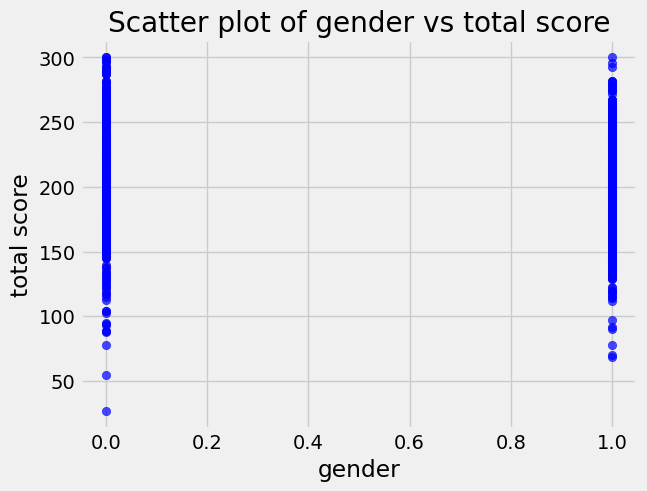

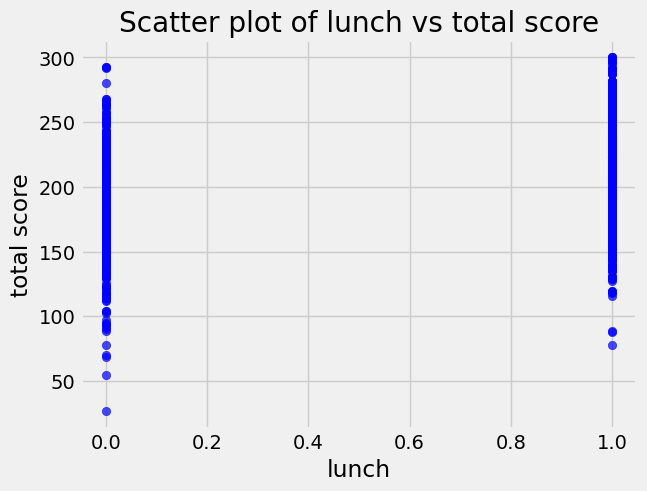

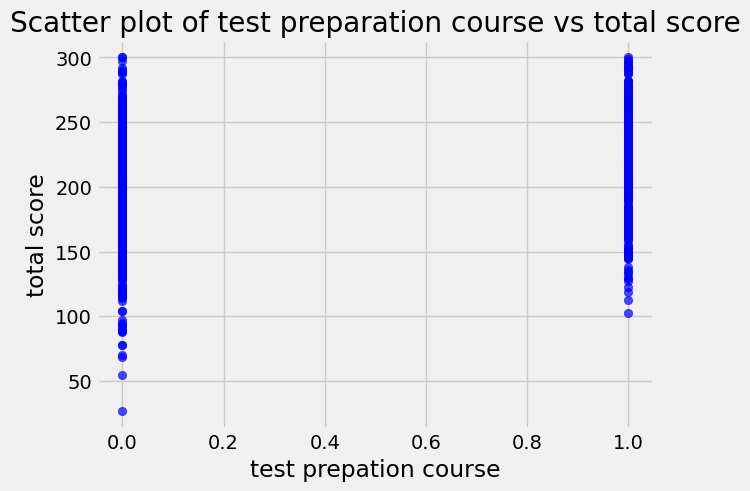

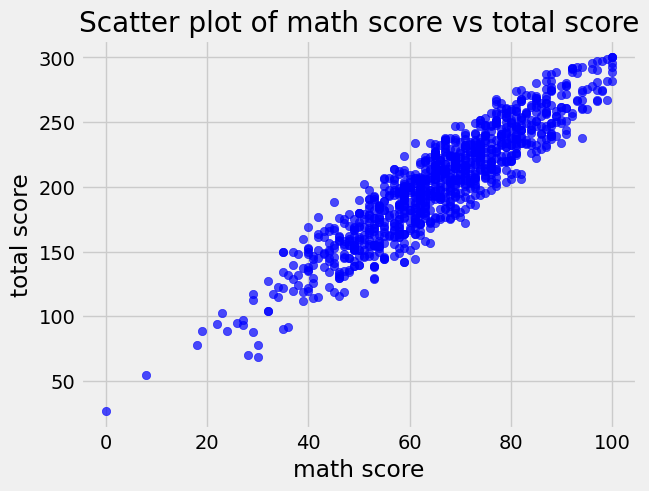

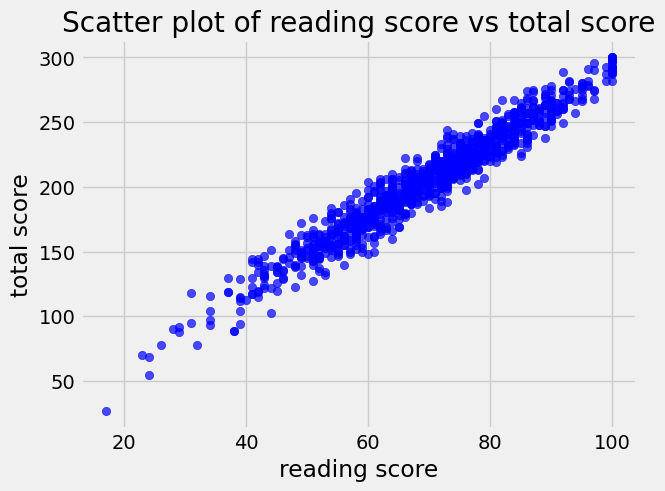

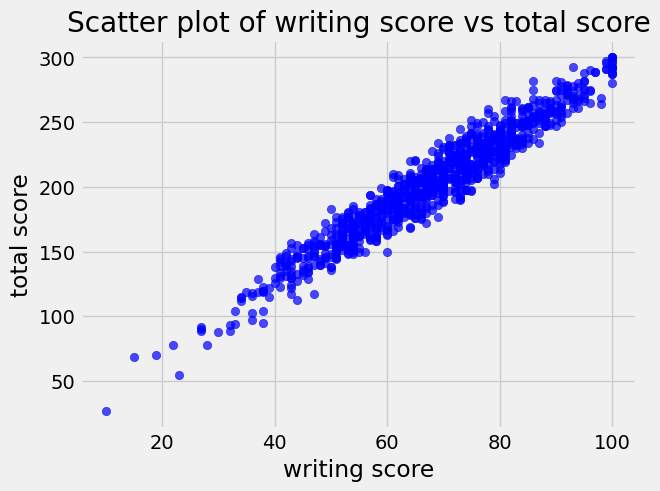

In [ ]:
plt.scatter(data['x1'], data['y1'], alpha=0.7, color='blue')
plt.xlabel('gender')
plt.ylabel('total score')
plt.title('Scatter plot of gender vs total score')
plt.show()

plt.scatter(data['x2'], data['y1'], alpha=0.7, color='blue')
plt.xlabel('lunch')
plt.ylabel('total score')
plt.title('Scatter plot of lunch vs total score')
plt.show()

plt.scatter(data['x3'], data['y1'], alpha=0.7, color='blue')
plt.xlabel('test prepation course')
plt.ylabel('total score')
plt.title('Scatter plot of test preparation course vs total score')
plt.show()

plt.scatter(data['x4'], data['y1'], alpha=0.7, color='blue')
plt.xlabel('math score')
plt.ylabel('total score')
plt.title('Scatter plot of math score vs total score')
plt.show()

plt.scatter(data['x5'], data['y1'], alpha=0.7, color='blue')
plt.xlabel('reading score')
plt.ylabel('total score')
plt.title('Scatter plot of reading score vs total score')
plt.show()

plt.scatter(data['x6'], data['y1'], alpha=0.7, color='blue')
plt.xlabel('writing score')
plt.ylabel('total score')
plt.title('Scatter plot of writing score vs total score')
plt.show()

# UJI F

In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f

# Mendefinisikan Hipotesis
# h0 = 'B1 = B2 = 0, tidak terdapat pengaruh signifikan secara serentak variabel independen berpengaruh terhadap variabel dependen'
# h1 = 'Minimal ada 1 bj ≠ 0, terdapat pengaruh signifikan secara serentak variabel independen berpengaruh terhadap variabel dependen'

# Menentukan alfa
alfa = 0.05

# Definisikan variabel dependen dan independen
x = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]  # Variabel independen (x1, x2, x3, x4)
y1 = data['y1']  # Variabel dependen

# Menambahkan konstanta (intercept) pada variabel independen
x = sm.add_constant(x)

# Menyusun model OLS
model = sm.OLS(y1, x).fit()

# F-statistic dan derajat bebas
fhitung = model.fvalue  # F-statistik dari model
df1 = x.shape[1] - 1  # Derajat bebas pembilang (jumlah variabel independen)
df2 = x.shape[0] - df1 - 1  # Derajat bebas penyebut (jumlah sampel - jumlah variabel - 1)

# Menghitung F-tabel
ftabel = f.ppf(1 - alfa, df1, df2)

# Output hasil
print('Nilai F tabel:', ftabel)
print('Nilai F hitung :', fhitung)

# menentukan titik kritis pengujian
if fhitung > ftabel:
    print("Karena F-hitung > F-tabel, maka H0 ditolak. Artinya, minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.")
else:
    print("Karena F-hitung < F-tabel, maka H0 gagal ditolak. Artinya, tidak ada variabel independen yang berpengaruh signifikan terhadap variabel dependennya.")


Nilai F tabel: 2.1076950595293455
Nilai F hitung : 5.28959135961116e+30
Karena F-hitung > F-tabel, maka H0 ditolak. Artinya, minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.


Dengan α sebesar 0.05, nilai Fhitung = 5.289 lebih besar dibandingkan F tabel = 2.107 dan juga nilai p-value yang didapatkan sebesar 0.00 yang kurang dari 0.05. Berdasarkan hal itu, dapat disimpulkan bahwa H0 ditolak yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya

# Uji R Squared

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Data
df = pd.DataFrame(data)

# Variabel dependen dan independen
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]  # Variabel independen
y = df['y1']  # Variabel dependen

# Menambahkan konstanta untuk intercept
X = sm.add_constant(X)

# Membuat model OLS
model = sm.OLS(y1, X).fit()

# Koefisien regresi dan prediksi
b0, b1, b2, b3, b4, b5, b6 = model.params
y_pred = model.predict(X)

# Menghitung SST (Total Sum of Squares)
mean_y1 = np.mean(y1)
sst = np.sum((y1 - mean_y1) ** 2)

# Menghitung SSR (Regression Sum of Squares)
ssr = np.sum((y_pred - mean_y1) ** 2)

# Menghitung SSE (Residual Sum of Squares)
sse = np.sum((y1 - y_pred) ** 2)

# Menghitung R-squared (Koefisien Determinasi)
r_squared = model.rsquared

# Output
print(f"Nilai SST (Total Sum of Squares): {sst}")
print(f"Nilai SSR (Regression Sum of Squares): {ssr}")
print(f"Nilai SSE (Residual Sum of Squares): {sse}")
print(f"Koefisien Determinasi (R-squared): {r_squared}")


Nilai SST (Total Sum of Squares): 1827612.656
Nilai SSR (Regression Sum of Squares): 1827612.6559999983
Nilai SSE (Residual Sum of Squares): 5.718209101699582e-23
Koefisien Determinasi (R-squared): 1.0


In [ ]:
adjusted_r_squared = model.rsquared_adj
print(f"R-Squared Adjusted : {adjusted_r_squared}")
print(f'\nArtinya sekitar {adjusted_r_squared*100}% variabel dependen yaitu dapat dijelaskan/dipengaruhi oleh variabel dependennya yaitu.\nsementara sisanya {(1-adjusted_r_squared)*100}% dipengaruhi oleh variabel yang tidak diketahui')

R-Squared Adjusted : 1.0

Artinya sekitar 100.0% variabel dependen yaitu dapat dijelaskan/dipengaruhi oleh variabel dependennya yaitu.
sementara sisanya 0.0% dipengaruhi oleh variabel yang tidak diketahui


# Uji Z

In [ ]:
import pandas as pd
import scipy.stats as stats

# Pengujian Hipotesis
# Hipotesis Nol (H₀): Rata-rata suatu variabel sama dengan nilai tertentu
# Hipotesis Alternatif (H₁): Rata-rata suatu variabel berbeda dari nilai tersebut.

# Menentukan kolom numerik
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(f"Kolom numerik dalam dataset: {list(numeric_columns)}")

# Menentukan nilai hipotesis (H₀: rata-rata variabel = mu)
mu = 50  # Hipotesis rata-rata (sesuaikan jika diperlukan)
alpha = 0.05  # Tingkat signifikansi

# Nilai z-tabel untuk uji dua sisi pada tingkat signifikansi alpha
z_tabel = stats.norm.ppf(1 - alpha / 2)

# 2. Iterasi untuk menguji semua variabel numerik
results = []

for col in numeric_columns:
    # Rata-rata dan standar deviasi sampel
    sample_mean = data[col].mean()
    sample_std = data[col].std()
    n = len(data[col])

    # Menghitung z-statistik
    z_stat = (sample_mean - mu) / (sample_std / (n ** 0.5))

    # Menghitung nilai p
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Uji dua sisi

    # Keputusan menggunakan z-tabel
    decision = "H₀ ditolak" if abs(z_stat) > z_tabel else "H₀ gagal ditolak"

    # Menyimpan hasil
    results.append({
        'Variabel': col,
        'Rata-rata Sampel': round(sample_mean, 2),
        'Z-Statistik': round(z_stat, 3),
        'Z-Tabel': round(z_tabel, 3),
        'P-Value': round(p_value, 5),
        'Keputusan': decision
    })

# 3. Menampilkan hasil secara ringkas
print("\nHasil Pengujian Hipotesis (dengan Z-Tabel):")
for result in results:
    print(
        f"Variabel: {result['Variabel']}, Z-Statistik: {result['Z-Statistik']}, "
        f"Z-Tabel: {result['Z-Tabel']}, P-Value: {result['P-Value']}, Keputusan: {result['Keputusan']}"
    )


Kolom numerik dalam dataset: ['gender', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']

Hasil Pengujian Hipotesis (dengan Z-Tabel):
Variabel: gender, Z-Statistik: -3132.257, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: lunch, Z-Statistik: -3260.017, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: test_preparation_course, Z-Statistik: -3272.827, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: math_score, Z-Statistik: 33.554, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: reading_score, Z-Statistik: 41.518, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: writing_score, Z-Statistik: 37.571, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: total_score, Z-Statistik: 113.349, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak
Variabel: average_score, Z-Statistik: 39.415, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H₀ ditolak


Dengan α sebesar 0.05,
* nilai zhitung x1 = -3132.257 lebih kecil dibandingkan z tabel = 1.96 dan juga nilai p-value yang didapatkan sebesar 0.0 yang kurang dari 0.05. Berdasarkan hal itu, dapat disimpulkan bahwa H0 ditolak yang artinya rata - rata variabel x1 (gender) berbeda dengan rata - rata variabel y1 (total score)

* nilai zhitung x2 = -32.60.017 lebih kecil dibandingkan t tabel = 1.96 dan juga nilai p-value yang didapatkan sebesar 0.0 yang kurang dari 0.05. Berdasarkan hal itu, dapat disimpulkan bahwa H0 ditolak yang artinya rata - rata variabel x2(lunch) berbeda dengan rata - rata variabel y1 (total score)

* nilai zhitung x3 = -3272.827 lebih kecil dibandingkan t tabel = 1.96 dan juga nilai p-value yang didapatkan sebesar 0.0 yang lebih dari 0.05. Berdasarkan hal itu, dapat disimpulkan bahwa H0 ditolak yang artinya rata - rata variabel x3 (test preparation course) berbeda dengan terhadap variabel y1 (total score)

* nilai thitung x4 = 33.554 lebih besar dibandingkan t tabel = 1.96 dan juga nilai p-value yang didapatkan sebesar 0.0 yang kurang dari 0.05. Berdasarkan hal itu, dapat disimpulkan bahwa H0 ditolak yang artinya rata - rata variabel x4 (math score) berbeda dengan variabel y1 (total score)

* nilai thitung x5 = 41.518 lebih besar dibandingkan t tabel = 1.96 dan juga nilai p-value yang didapatkan sebesar 0.0 yang kurang dari 0.05. Berdasarkan hal itu, dapat disimpulkan bahwa H0 ditolak yang artinya rata - rata variabel x5 (reading score) berbeda dengan variabel y1 (total score)

*  nilai thitung x6 = 37.571 lebih besar dibandingkan t tabel = 1.96 dan juga nilai p-value yang didapatkan sebesar 0.0 yang kurang dari 0.05. Berdasarkan hal itu, dapat disimpulkan bahwa H0 ditolak yang artinya rata - rata variabel x6 (writing score) berbeda dengan variabel y1 (total score)

# Uji Asumsi Regresi

# Uji Berdistribusi normal menggunakan uji jarque bera

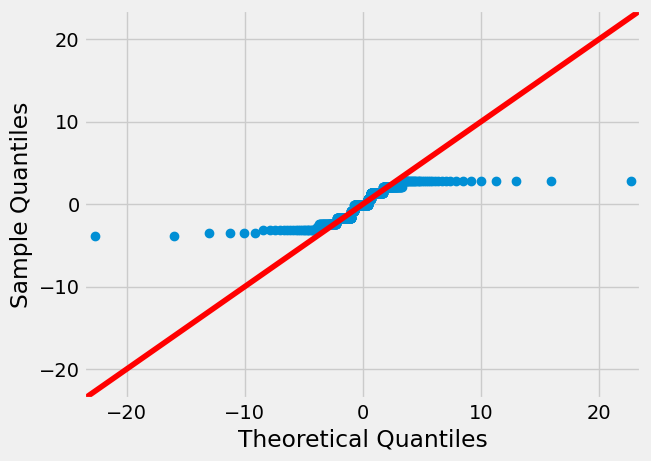

In [ ]:
import scipy.stats as stats
fig = sm.qqplot(residual, stats.t, fit=True, line="45")
plt.show()

Terlihat bahwa distribusi data residual tidak mendekati garis linear sehingga dapat disimpulkan bahwa data residual tersebut tidak memenuhi asumsi berdistribusi normal

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Data
df = pd.DataFrame(data)

# Variabel dependen dan independen
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]  # Variabel independen
y = df['y1']  # Variabel dependen

# Menambahkan konstanta untuk intercept
X = sm.add_constant(X)

# Membuat model OLS
model = sm.OLS(y1, X).fit()

# Mengambil residual dari model
residuals = model.resid

# Menghitung uji Jarque-Bera
jb_stat, jb_p_value = stats.jarque_bera(residuals)

# Menampilkan hasil uji Jarque-Bera
print(f"Nilai statistik Jarque-Bera: {jb_stat:.4f}")
print(f"Nilai p-value: {jb_p_value:.4f}")

# Menentukan keputusan berdasarkan p-value
alpha = 0.05
if jb_p_value < alpha:
    print("Tolak H0: Residual tidak berdistribusi normal.")
else:
    print("Gagal tolak H0: Residual berdistribusi normal.")


Nilai statistik Jarque-Bera: 6.8742
Nilai p-value: 0.0322
Tolak H0: Residual tidak berdistribusi normal.


# Perbaiki distribusi yang tidak normal

Kolom numerik dalam dataset: ['gender', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']
Kolom gender tetap tidak normal meskipun sudah ditransformasi.
Kolom lunch tetap tidak normal meskipun sudah ditransformasi.
Kolom test_preparation_course tetap tidak normal meskipun sudah ditransformasi.
Kolom math_score tetap tidak normal meskipun sudah ditransformasi.
Kolom reading_score tetap tidak normal meskipun sudah ditransformasi.
Kolom writing_score tetap tidak normal meskipun sudah ditransformasi.
Kolom total_score tidak normal, tetapi menjadi normal setelah transformasi boxcox.
Kolom average_score tidak normal, tetapi menjadi normal setelah transformasi boxcox.

Hasil untuk kolom: gender
Transformasi terbaik: Tidak berhasil
Keputusan: Data tetap tidak normal


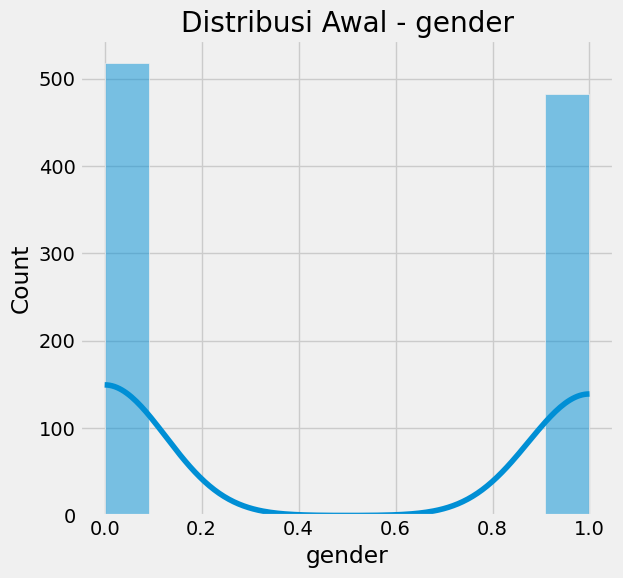


Hasil untuk kolom: lunch
Transformasi terbaik: Tidak berhasil
Keputusan: Data tetap tidak normal


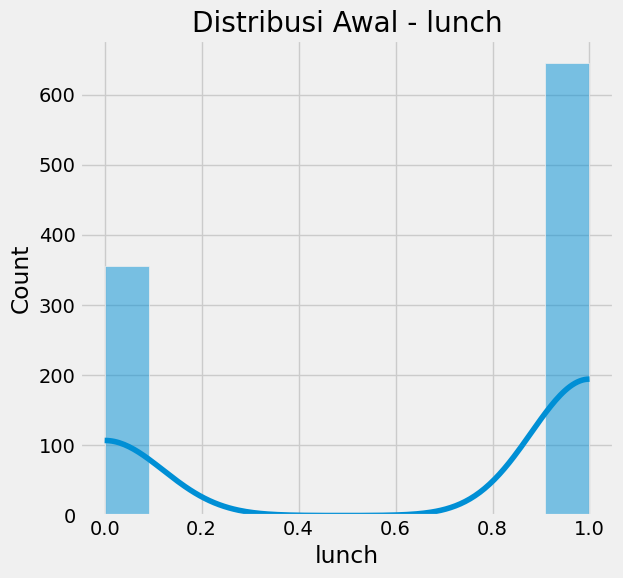


Hasil untuk kolom: test_preparation_course
Transformasi terbaik: Tidak berhasil
Keputusan: Data tetap tidak normal


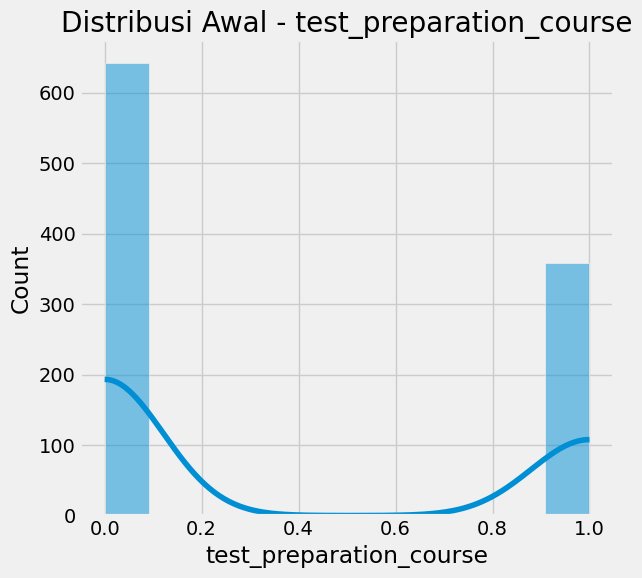


Hasil untuk kolom: math_score
Transformasi terbaik: Tidak berhasil
Keputusan: Data tetap tidak normal


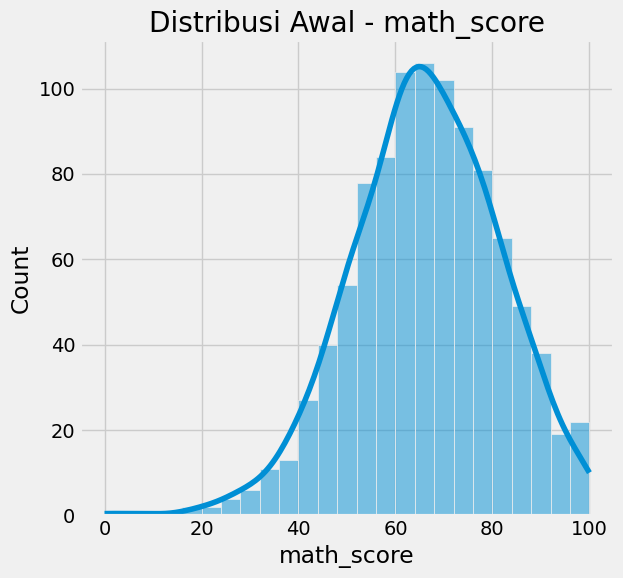


Hasil untuk kolom: reading_score
Transformasi terbaik: Tidak berhasil
Keputusan: Data tetap tidak normal


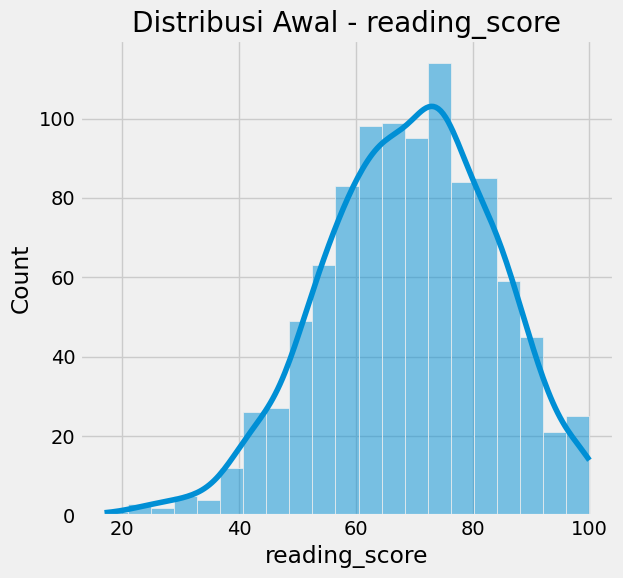


Hasil untuk kolom: writing_score
Transformasi terbaik: Tidak berhasil
Keputusan: Data tetap tidak normal


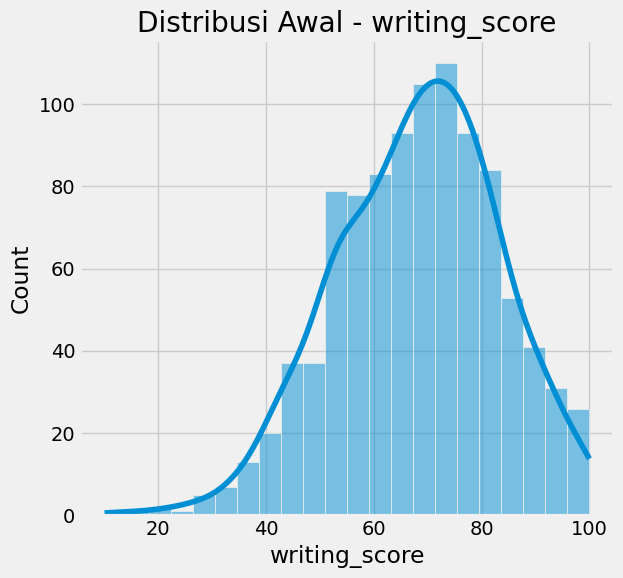


Hasil untuk kolom: total_score
Transformasi terbaik: boxcox
Keputusan: Data berhasil ditransformasi menjadi normal


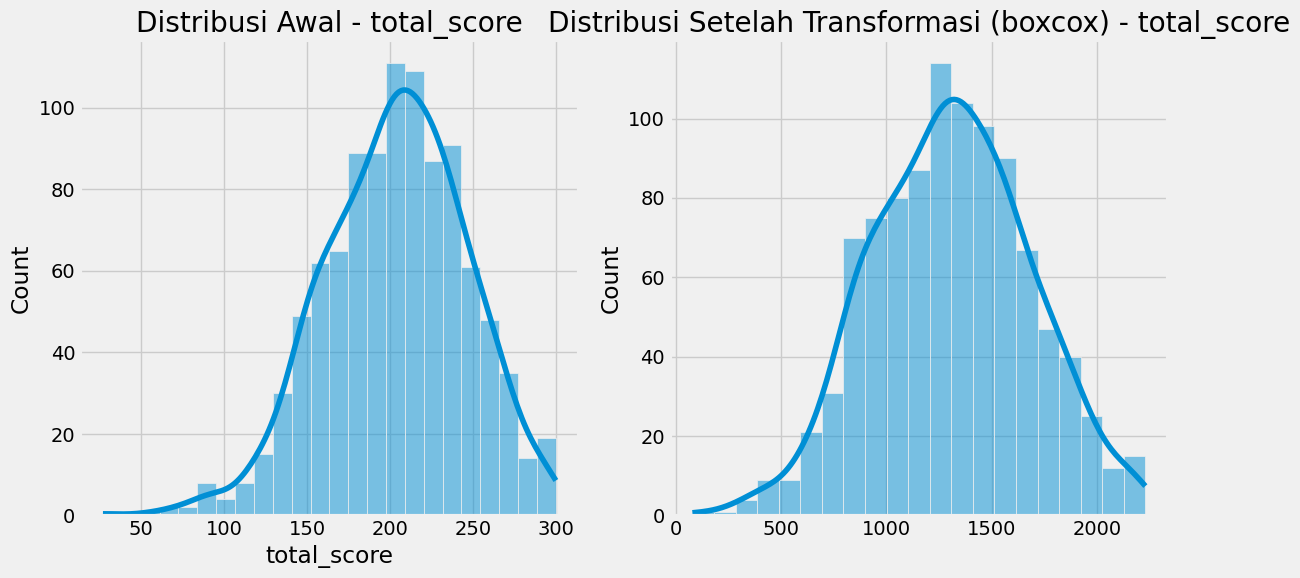


Hasil untuk kolom: average_score
Transformasi terbaik: boxcox
Keputusan: Data berhasil ditransformasi menjadi normal


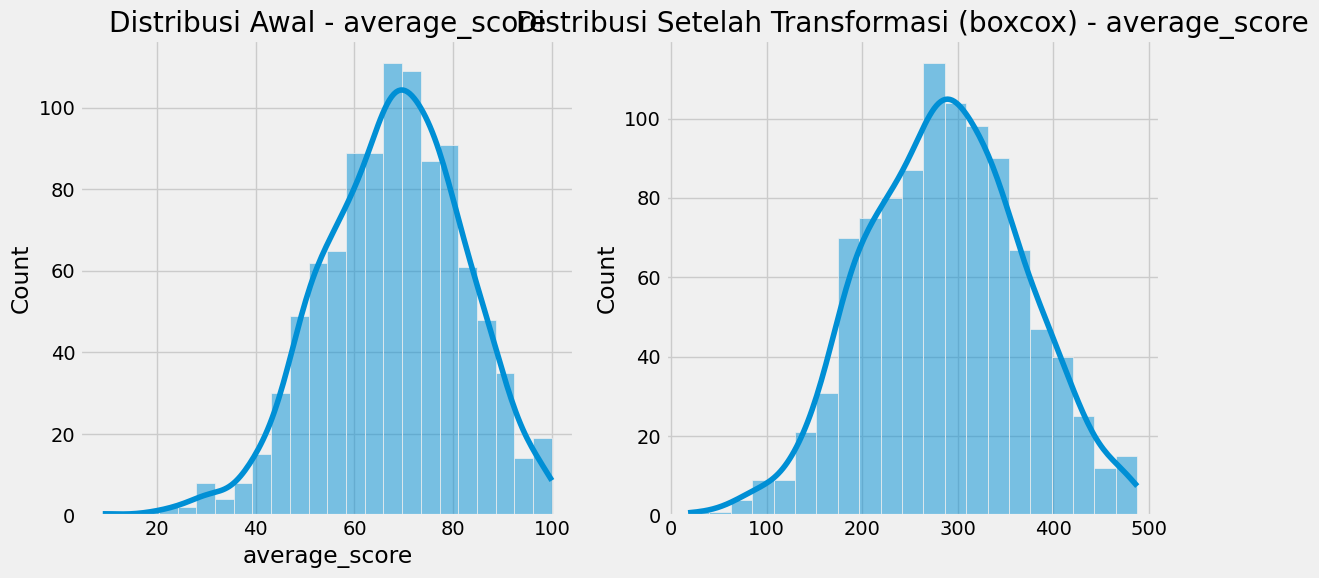

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan variabel numerik
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(f"Kolom numerik dalam dataset: {list(numeric_columns)}")

# Fungsi untuk memeriksa normalitas
def check_normality(column, alpha=0.05):
    stat, p_value = stats.shapiro(column)
    return "Normal" if p_value > alpha else "Tidak Normal"

# Fungsi untuk transformasi data
def transform_to_normal(column):
    transformations = {
        'log': np.log1p(column),  # log(1+x) untuk menghindari log(0)
        'sqrt': np.sqrt(column),  # Akar kuadrat
        'boxcox': stats.boxcox(column + 1)[0] if (column > 0).all() else None,  # Box-Cox (hanya untuk data > 0)
    }
    return transformations

# 2. Iterasi untuk memproses setiap variabel
results = {}
for col in numeric_columns:
    original_data = data[col].dropna()  # Menghapus nilai NaN

    # Cek normalitas awal
    initial_normality = check_normality(original_data)

    if initial_normality == "Normal":
        print(f"Kolom {col} sudah berdistribusi normal.")
        results[col] = {
            'Original': original_data,
            'Transformasi': 'Tidak diperlukan',
            'Keputusan': 'Data sudah normal'
        }
        continue

    # Transformasi data
    transformed_data = transform_to_normal(original_data)
    best_transform = None

    for transform, transformed_col in transformed_data.items():
        if transformed_col is not None:  # Cek jika transformasi berhasil
            normality = check_normality(transformed_col)
            if normality == "Normal":
                best_transform = transform
                break

    if best_transform:
        print(f"Kolom {col} tidak normal, tetapi menjadi normal setelah transformasi {best_transform}.")
        results[col] = {
            'Original': original_data,
            'Transformasi': best_transform,
            'Keputusan': 'Data berhasil ditransformasi menjadi normal'
        }
    else:
        print(f"Kolom {col} tetap tidak normal meskipun sudah ditransformasi.")
        results[col] = {
            'Original': original_data,
            'Transformasi': 'Tidak berhasil',
            'Keputusan': 'Data tetap tidak normal'
        }

# 3. Visualisasi hasil
for col, res in results.items():
    print(f"\nHasil untuk kolom: {col}")
    print(f"Transformasi terbaik: {res['Transformasi']}")
    print(f"Keputusan: {res['Keputusan']}")

    # Plot distribusi awal dan setelah transformasi (jika ada)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(res['Original'], kde=True)
    plt.title(f"Distribusi Awal - {col}")

    if res['Transformasi'] != 'Tidak diperlukan' and res['Transformasi'] != 'Tidak berhasil':
        plt.subplot(1, 2, 2)
        transformed_col = transform_to_normal(res['Original'])[res['Transformasi']]
        sns.histplot(transformed_col, kde=True)
        plt.title(f"Distribusi Setelah Transformasi ({res['Transformasi']}) - {col}")

    plt.tight_layout()
    plt.show()


# uji autokorelasi menggunakan durbin watson


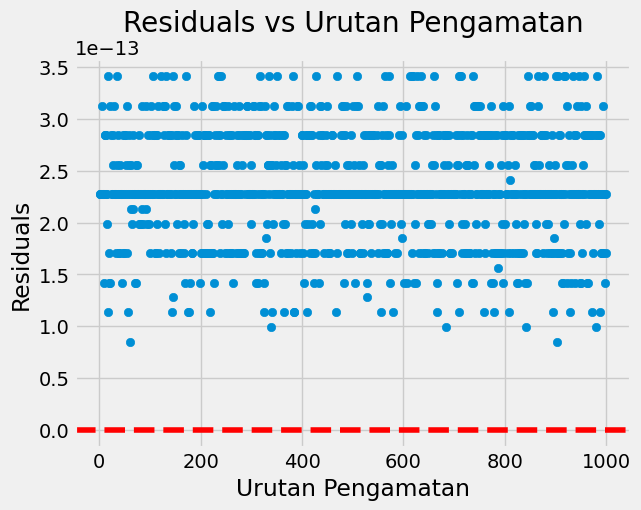

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Get the residuals from the model
model = sm.OLS(y1, X).fit()
residuals = model.resid

urutan_pengamatan = pd.Series(range(1, len(residuals) + 1), name='Urutan Pengamatan')
plt.scatter(urutan_pengamatan, residuals)
plt.axhline(y=0, linestyle='--', color='r')
plt.xlabel('Urutan Pengamatan')
plt.ylabel('Residuals')
plt.title('Residuals vs Urutan Pengamatan')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Data
df = pd.DataFrame(data)

# Variabel dependen dan independen
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]  # Variabel independen
y = df['y1']  # Variabel dependen

# Menambahkan konstanta untuk intercept
X = sm.add_constant(X)

# Membuat model OLS
model = sm.OLS(y1, X).fit()

# Mengambil residual dari model
residuals = model.resid

# Menghitung Durbin-Watson Statistic
dw_stat = durbin_watson(residuals)

# Menampilkan hasil uji Durbin-Watson
print(f"Nilai Durbin-Watson: {dw_stat:.4f}")

# Menentukan keputusan berdasarkan nilai Durbin-Watson
if dw_stat < 1.5:
    print("Terdapat autokorelasi positif (nilai Durbin-Watson < 1.5).")
elif dw_stat > 2.5:
    print("Terdapat autokorelasi negatif (nilai Durbin-Watson > 2.5).")
else:
    print("Tidak terdapat autokorelasi (nilai Durbin-Watson sekitar 2).")


Nilai Durbin-Watson: 0.1035
Terdapat autokorelasi positif (nilai Durbin-Watson < 1.5).


# Perbaikan dari autokorelasi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Menambahkan fitur lag pada kolom prediktor utama
data['math_score_lag'] = data['math_score'].shift(1)
data['reading_score_lag'] = data['reading_score'].shift(1)
data['writing_score_lag'] = data['writing_score'].shift(1)

# Menghapus baris dengan nilai NaN (karena lag menghasilkan NaN pada baris pertama)
data_lag = data.dropna()

# Memisahkan fitur (X) dan target (y)
features = ['math_score', 'reading_score', 'writing_score',
            'math_score_lag', 'reading_score_lag', 'writing_score_lag']
X = data_lag[features]
y = data_lag['total_score']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi nilai pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(5.371827220193002e-28, 1.0)

Penjelasan


---
* Mean Squared Error (MSE): ~0, artinya kesalahan rata-rata prediksi sangat kecil.
* R-squared: 1.0, menunjukkan bahwa model mampu menjelaskan 100% variasi pada data target (total_score).


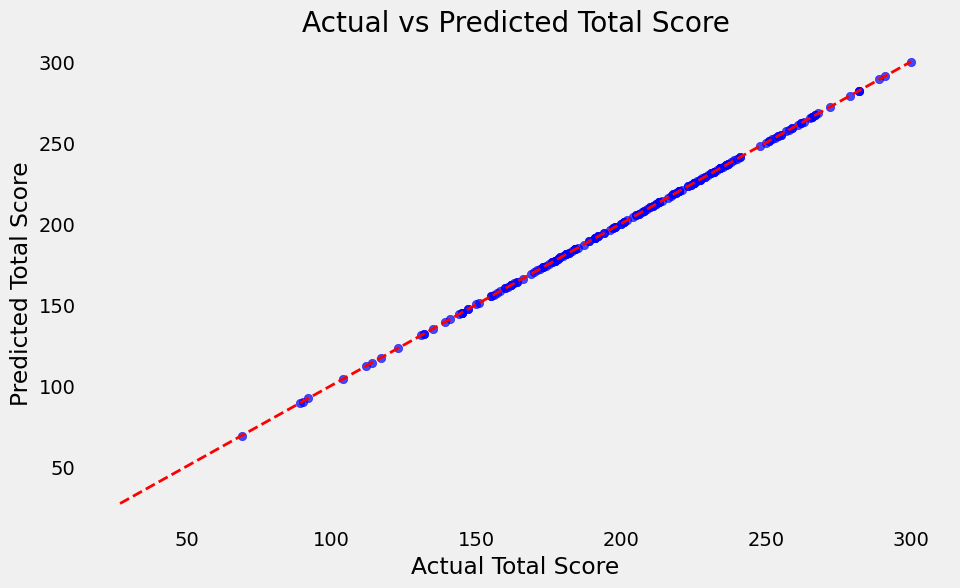

,Feature,Coefficient
2,writing_score,1.000000e+00
0,math_score,1.000000e+00
1,reading_score,1.000000e+00
4,reading_score_lag,1.283695e-16
3,math_score_lag,6.245005e-17
5,writing_score_lag,-1.769418e-16


In [ ]:
import matplotlib.pyplot as plt

# Visualisasi: Plot prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Total Score')
plt.xlabel('Actual Total Score')
plt.ylabel('Predicted Total Score')
plt.grid()
plt.show()

# Interpretasi: Menampilkan koefisien regresi
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
coefficients.sort_values(by='Coefficient', ascending=False)

Interpretasi


---
* math_score, reading_score, writing_score memiliki koefisien sebesar 1.0, yang menunjukkan kontribusi linier sempurna terhadap total_score.
* math_score_lag, reading_score_lag, writing_score_lag memiliki nilai koefisien yang sangat kecil mendekati nol, yang menunjukkan bahwa lag dari fitur tidak memberikan kontribusi signifikan pada prediksi

 Model ini sepenuhnya didominasi oleh nilai asli dan bukan lag / prediksi sehingga fitur lag / regresi distribusi lag untuk memperbaiki autokorelasi tidak dapat mengatasi autokorelasi tersebut karena kurang relevan dalam dataset ini dimana seharusnya regresi distribusi lag harus menggunakan data time series, tetapi di dataset ini tidak ada kolom yang merepresentasikan data series dan korelasi di dataset ini hampir sempurna sehingga menyebabkan terjadinya autokorelasi.


# uji heteroskedastisitas menggunakan uji gletser

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Data
df = pd.DataFrame(data)

# Variabel dependen dan independen
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]  # Variabel independen
y = df['y1']  # Variabel dependen

# Menambahkan konstanta untuk intercept
X = sm.add_constant(X)

# Membuat model OLS
model = sm.OLS(y1, X).fit()

# Mengambil residual dari model
residuals = model.resid

# Melakukan regresi dari nilai absolut residual terhadap variabel independen
abs_residuals = np.abs(residuals)
model_glejser = sm.OLS(abs_residuals, X).fit()

# Menampilkan ringkasan hasil uji Glejser
print(model_glejser.summary())

# Interpretasi
p_values = model_glejser.pvalues[1:]  # Mengambil p-values koefisien variabel independen
significant_vars = [var for var, p in zip(X.columns, p_values) if p < 0.05]

if significant_vars:
    print(f"Variabel yang signifikan terhadap heteroskedastisitas: {', '.join(significant_vars)}")
    print("Ada indikasi heteroskedastisitas.")
else:
    print("Tidak ada indikasi heteroskedastisitas.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2989.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:09:56   Log-Likelihood:                 30609.
No. Observations:                1000   AIC:                        -6.120e+04
Df Residuals:                     993   BIC:                        -6.117e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.869e-14   2.16e-15     31.771      0.0

# Perbaiki Heteroskedastisitas

In [ ]:
import statsmodels.api as sm

# Menambahkan intercept (konstanta) ke dalam fitur untuk model statsmodels
X_with_intercept = sm.add_constant(X)

# Langkah 1: Model OLS untuk mendapatkan residual
ols_model = sm.OLS(y, X_with_intercept).fit()
residuals = ols_model.resid

# Langkah 2: Hitung bobot (menggunakan kuadrat residual sebagai proksi varians)
weights = 1 / (residuals**2 + 1e-5)  # Tambahkan nilai kecil untuk menghindari pembagian dengan nol

# Langkah 3: Fit WLS menggunakan bobot
wls_model = sm.WLS(y, X_with_intercept, weights=weights).fit()

# Ringkasan hasil WLS
wls_summary = wls_model.summary()
wls_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.913e+31
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        04:06:55   Log-Likelihood:                 28996.
No. Observations:                1000   AIC:                        -5.798e+04
Df Residuals:                     993   BIC:                        -5.794e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.908e-14   1.09e-14     -3.602      0.000   -6.04e-14   -1.78e-14
x1          1.337e-13   6.27e-15     21.325      0.000    1.21e-13    1.46e-13
x2          2.842e-14   4.46e-15      6.370      0.000    1.97e-14    3.72e-14
x3         -1.299e-14   4.61e-15     -2.816      0.005    -2.2e-14   -3.94e-15
x4             1.0000   3.49e-16   2.86e+15      0.000       1.000       1.000
x5             1.0000   4.83e-16   2.07e+15      0.000       1.000       1.000
x6             1.0000   5.25e-16   1.91e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                    25954.082   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.376
Skew:                           0.021   Prob(JB):                     1.58e-17
Kurtosis:                       1.638   Cond. No.                         696.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

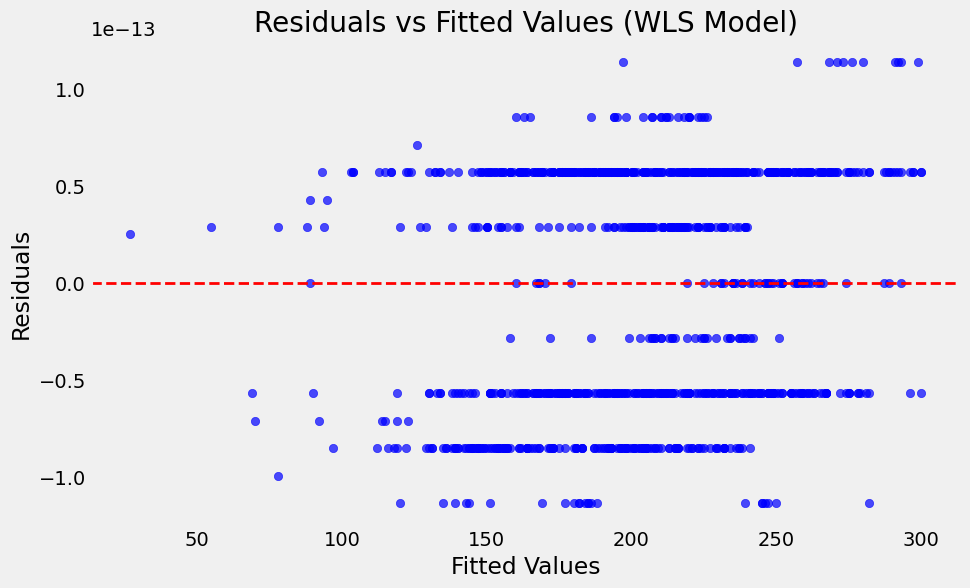

In [ ]:
# Import the necessary library
import matplotlib.pyplot as plt

# Menghitung residual dan fitted values dari model WLS
fitted_values = wls_model.fittedvalues
residuals_wls = wls_model.resid

# Membuat plot residual vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals_wls, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values (WLS Model)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

Penjelasan


---


Berdasarkan plot ini, heteroskedastisitas tampaknya sudah berhasil diatasi. Residual tersebar secara acak tanpa ada pola yang menunjukkan bahwa varians residual berubah seiring dengan nilai fitted. Ini adalah tanda bahwa model WLS sudah efektif dalam mengatasi masalah heteroskedastisitas.

# Uji Multikolinearitas menggunakan uji VIF (Variance Influence Factor)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Misalnya df adalah DataFrame yang sudah berisi data
# Himpunan variabel independen (x1 hingga x6)
x = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]

# DataFrame untuk menyimpan hasil VIF
vif_data = pd.DataFrame()
vif_data["fitur"] = x.columns

# Menghitung VIF untuk setiap fitur
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

# Menampilkan hasil VIF
print(vif_data)

# Interpretasi VIF
for index, row in vif_data.iterrows():
    if row["VIF"] > 10:
        print(f'{row["fitur"]} memiliki multikolinearitas tinggi (VIF = {row["VIF"]:.2f}).')
    else:
        print(f'{row["fitur"]} memiliki multikolinearitas yang dapat diterima (VIF = {row["VIF"]:.2f}).')


  fitur         VIF
0    x1    3.916573
1    x2    3.325072
2    x3    1.913965
3    x4  137.917424
4    x5  286.139921
5    x6  334.418218
x1 memiliki multikolinearitas yang dapat diterima (VIF = 3.92).
x2 memiliki multikolinearitas yang dapat diterima (VIF = 3.33).
x3 memiliki multikolinearitas yang dapat diterima (VIF = 1.91).
x4 memiliki multikolinearitas tinggi (VIF = 137.92).
x5 memiliki multikolinearitas tinggi (VIF = 286.14).
x6 memiliki multikolinearitas tinggi (VIF = 334.42).


# Perbaikan Multikolinearitas

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Menyiapkan variabel independen (fitur) dan dependen (target)
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]  # Variabel independen
y = df['y1']  # Variabel dependen (target)

# Encode categorical variables menggunakan one-hot encoding (jika perlu)
X = pd.get_dummies(X, drop_first=True)

# Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi data fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model Ridge dengan parameter alpha (regularisasi)
ridge_model = Ridge(alpha=1.0)

# Latih model dengan data latih
ridge_model.fit(X_train_scaled, y_train)

# Prediksi menggunakan data uji
y_pred = ridge_model.predict(X_test_scaled)

# Hitung Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Tampilkan hasil koefisien dan MSE
print("Koefisien Ridge Regression:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean Squared Error (MSE):", mse)


Koefisien Ridge Regression: [-5.50705601e-03  8.30389441e-03  8.69394529e-03  1.50070384e+01
  1.44649621e+01  1.50447937e+01]
Intercept: 204.5075
Mean Squared Error (MSE): 0.0006387681926190591


Penjelasan


---


Dari hasil pengujian regresi ridge diatas didapatkan regresi ridge mengecilkan nilai koefisien dari yang sebelumnya memiliki multikolinearitas yang tinggi yaitu [3.92, 3.33, 1.91, 137.92, 286.14, 334.42] menjadi [-5.50, 8.30, 8.69, 1.50, 1.44, 150] dimana nilai koefisien sudah mengecil dari yang sebelumnya dan menurunkan nilai multikolinearitas menggunakan uji regresi ridge.






# MACHINE LEARNING

# Menggunakan Model Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Defining the features and target variable
X = data[['x4', 'x5', 'x6']]
y = data['x3']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = nb_model.predict(X_test)

# Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.6566666666666666,
 '              precision    recall  f1-score   support\n\n           0       0.72      0.74      0.73       190\n           1       0.53      0.51      0.52       110\n\n    accuracy                           0.66       300\n   macro avg       0.63      0.63      0.63       300\nweighted avg       0.65      0.66      0.65       300\n')

Model Naive Bayes berhasil mencapai akurasi 65.7% dalam memprediksi apakah siswa mengikuti kursus persiapan ujian. Berikut adalah detail evaluasinya:

* Precision (0): 72% (siswa yang diprediksi tidak mengikuti kursus).
* Precision (1): 53% (siswa yang diprediksi mengikuti kursus).
* Recall: Setara untuk kedua kelas sekitar 51-74%.
* F1-Score: 52% untuk siswa yang mengikuti kursus dan 73% untuk yang tidak.

In [ ]:
# Separating students who took the preparation course and calculating their average score statistics
course_taken = data[data['x3'] == 1]
average_above_60 = (course_taken['y2'] > 60).mean() * 100  # Persen dari murid ketika rata - rata nilai > 60

# Average score statistics for students who took the course
average_score_stats = course_t aken['y2'].describe()

average_above_60, average_score_stats


(81.84357541899442,
 count    358.000000
 mean      72.669460
 std       13.036960
 min       34.333333
 25%       65.000000
 50%       73.500000
 75%       82.166667
 max      100.000000
 Name: y2, dtype: float64)

Sebanyak 81.8% siswa yang mengikuti kursus persiapan ujian memiliki rata-rata nilai lebih dari 60. Statistik nilai rata-rata mereka:

* Rata-rata: 72.67
* Standar deviasi: 13.04
* Nilai minimum: 34.33
* Nilai maksimum: 100.00
* Kuartil:
1. Kuartil 25%: 65.00
2. Kuartil Median (50%): 73.50
3. Kuartil 75%: 82.17

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Model performance metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, report_rf


(0.6533333333333333,
 '              precision    recall  f1-score   support\n\n           0       0.70      0.79      0.74       190\n           1       0.53      0.42      0.47       110\n\n    accuracy                           0.65       300\n   macro avg       0.62      0.60      0.61       300\nweighted avg       0.64      0.65      0.64       300\n')

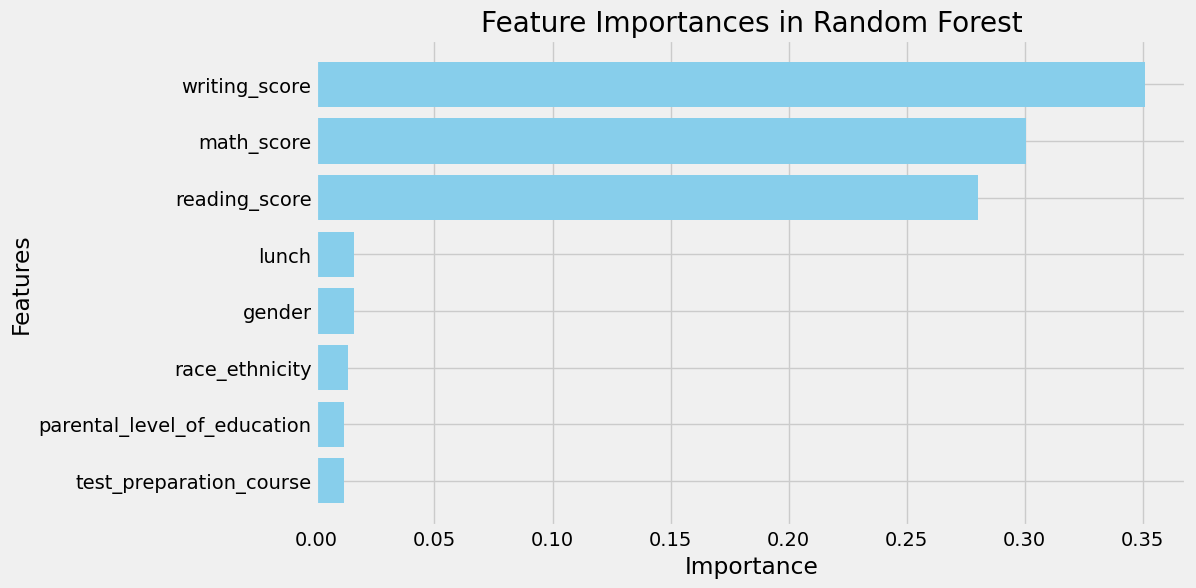

(Index(['writing_score', 'math_score', 'reading_score', 'lunch', 'gender',
        'race_ethnicity', 'parental_level_of_education',
        'test_preparation_course'],
       dtype='object'),
 array([0.35094391, 0.30038273, 0.28003556, 0.01608868, 0.01588758,
        0.01348759, 0.0116897 , 0.01148425]))

In [ ]:
# Step 1: Add pass/fail column based on average_score
data['pass_fail'] = (data['average_score'] >= 60).astype(int)

# Step 2: Encode categorical variables
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder_race = LabelEncoder()
encoder_education = LabelEncoder()

data['race_ethnicity'] = encoder_race.fit_transform(data['race_ethnicity'])
data['parental_level_of_education'] = encoder_education.fit_transform(data['parental_level_of_education'])

# Step 3: Define features (X) and target (y)
X = data.drop(columns=['average_score', 'total_score', 'pass_fail'])  # Drop unrelated columns
y = data['pass_fail']

# Import train_test_split
from sklearn.model_selection import train_test_split # Importing the train_test_split function

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest model
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier # Importing the RandomForestClassifier class
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Analyze feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot feature importances
# Import matplotlib.pyplot
import matplotlib.pyplot as plt # Importing the pyplot module and aliasing it as plt

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances in Random Forest")
plt.gca().invert_yaxis()  # Flip the y-axis for better readability
plt.show()

sorted_features, sorted_importances

Berdasarkan grafik Feature Importances pada Random Forest:

Fitur Paling Penting:

1. Writing Score (Skor Menulis): Menjadi fitur paling berpengaruh dalam menentukan apakah siswa lulus atau gagal.
2. Math Score (Skor Matematika): Fitur kedua paling penting.
3. Reading Score (Skor Membaca): Fitur ketiga yang signifikan.
Fitur Kurang Berpengaruh:

* Fitur seperti lunch, gender, race_ethnicity, parental_level_of_education, dan test_preparation_course memiliki kontribusi yang kecil terhadap prediksi model.

Kesimpulannya adalah Skor Akademik (menulis, matematika, membaca) mendominasi prediksi kelulusan siswa. Ini logis karena kelulusan siswa biasanya langsung terkait dengan nilai akademik. Fitur variabel lain seperti jenis kelamin, latar belakang pendidikan orang tua, atau persiapan ujian tidak memberikan kontribusi signifikan dalam prediksi.

# Kesimpulan metode yang lebih baik di Machine Learning

Perbandingan antara Model Naive Bayes dan Model Random Forest

Model Naive Bayes :
1. Akurasi: 69.33%,
2. Cenderung kurang baik dalam memprediksi kelas minoritas (siswa yang tidak lulus), terlihat dari rendahnya Recall (32%) untuk kelas 0.
3. Cocok untuk data dengan asumsi fitur independen, tetapi kinerjanya kurang optimal di dataset ini karena hubungan antar fitur yang mungkin lebih kompleks.

Model Random Forest:
1. Model ini memiliki kemampuan menangkap hubungan non-linear antar fitur.
Fitur akademik (writing_score, math_score, reading_score) memberikan kontribusi terbesar terhadap prediksi.
2. Secara umum, Random Forest biasanya memiliki akurasi yang lebih tinggi dibandingkan Naive Bayes, terutama pada dataset dengan fitur kompleks.

Kesimpulannya adalah dari data yang ada, Random Forest tampaknya lebih unggul dibandingkan Naive Bayes karena mampu memanfaatkan hubungan antar fitur dengan lebih baik. Akurasi, recall, dan kemampuan memprediksi kelas minoritas (siswa tidak lulus) kemungkinan besar lebih baik pada Random Forest.